# Intro to Kepler Data

The data from the Kepler mission is freely available from the NASA website. Here you can get familiar with what to do with the Kepler data.

## Reading in the data
We will be using the same method of reading data that we will be using is the same demonstrated in the previous notebook, so lets load all the libraries we need before we get started.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
##magic command to get plots working in notebooks
%matplotlib notebook 

Some light curves are already available in the  ```./Data``` directory, for this example we will use ```KIC006922244.tbl```. To read in the 3 columns of the file we will use ```np.loadtxt``` skipping the 3 rows of headder by using ```skiprows=3```

In [30]:
z, t, flux = np.loadtxt("Data/KIC006922244.tbl",unpack=True,skiprows=3)

We don't really care about ```z```, so let's look at what our data looks like by plotting it.

<IPython.core.display.Javascript object>


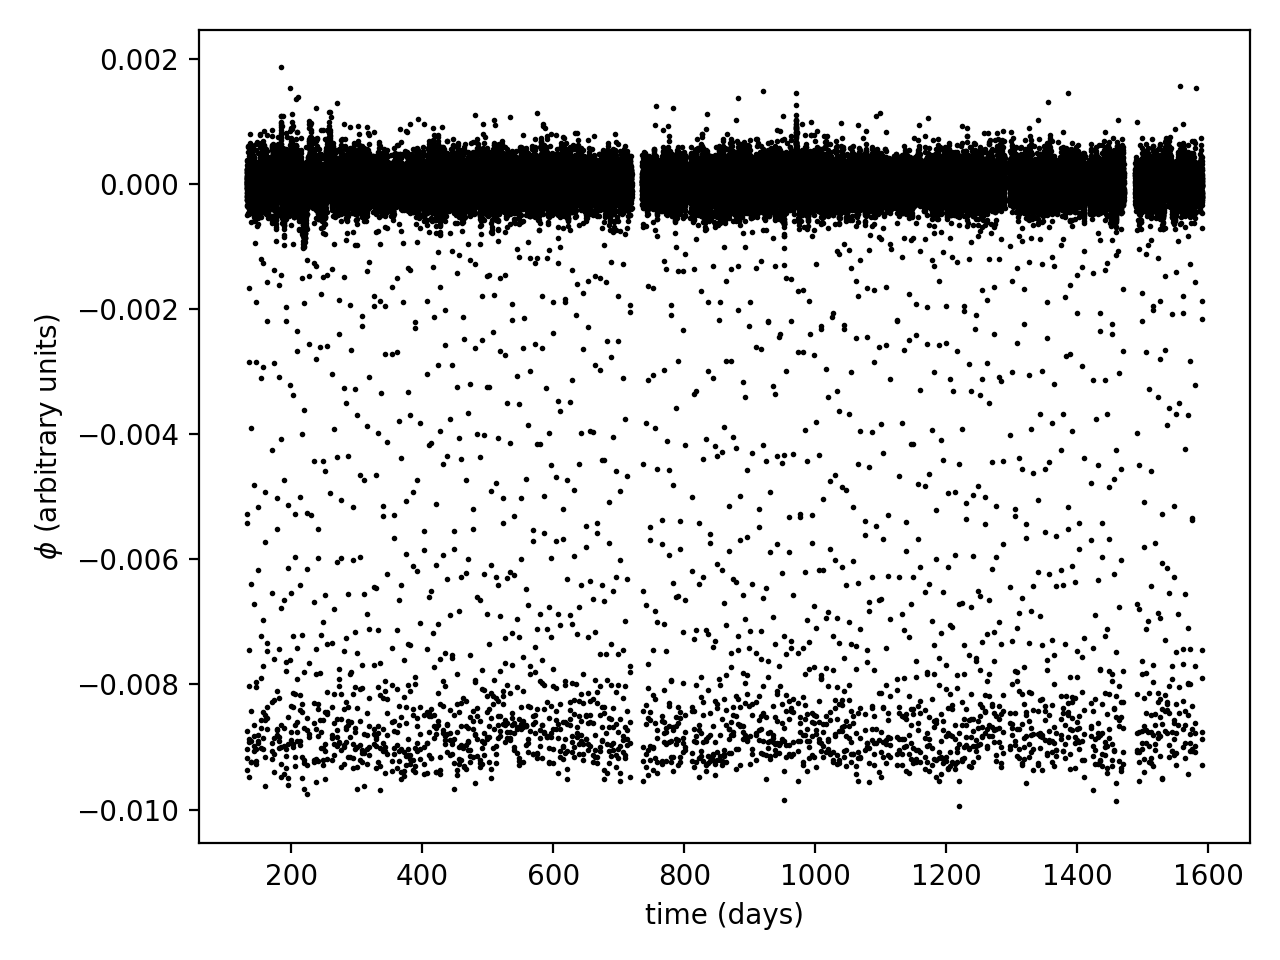

In [31]:
plt.figure()
plt.plot(t,flux,'k.',markersize=2)
plt.xlabel("time (days)")
plt.ylabel("$\phi$ (arbitrary units)")
plt.tight_layout()
plt.show()

Well, that is looking good! We now have a plot of all the luminosity data collected on this object. Each point on this graph is a reading of the stellar flux on the sensor. The data has already been baselined, you can see this from the fact that most of the data is sitting happily around 0 and there is no visible long term trend in the data.

#### Transits
The dips that can be seen in the data are the transits, we can take a closer look by using the zoom tool in our interactive plot.![Zoom button](./zoomTool.png) 
Zooming into just a few transits, it looks like this:![Zoomed into a few transits](./Zoomed.png)
Then by moving your mouse around on the screen you can narrow down the coordinates of each transit. You will need to do something like this to get a rough guess of the transit frequence (how often the transits occur. I would reccomend taking the average of a few guessed periods.

## Phase folding
We have now read the data, plotted it and gotten an estimate of the period it is time to phase fold. Phase folding is an operation where periodic data is folded over itself at the right interval, so that later periods fill in the gaps in the data. This is done with a modulo operation on the $x$ coordinate,
\begin{equation}
x\rightarrow x \: \mathrm{mod} \: T
\end{equation}
where $T$ is the period of the data. Lets test this by generating some very sparse periodic data then phase folding it.

<IPython.core.display.Javascript object>


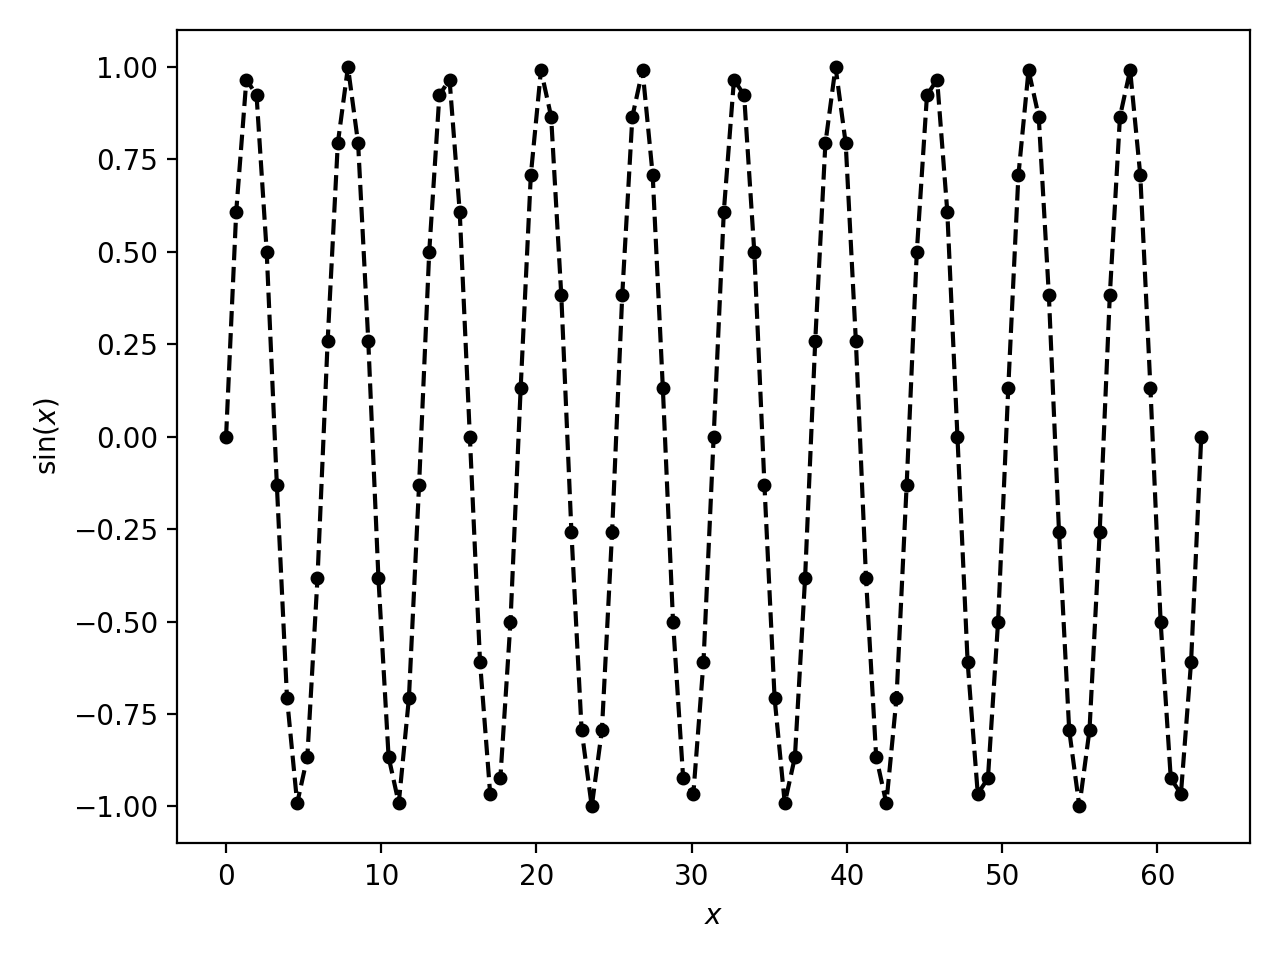

In [32]:
#import numpy.random as rand
x=np.linspace(0,20*np.pi,97) # 97 points in x between 0 and 20π
y=np.sin(x) # y=sin(x)

plt.figure()
plt.plot(x,y,"k.--",markersize=8)
plt.xlabel("$x$")
plt.ylabel("$\sin(x)$")
plt.tight_layout()
plt.show()

well... this looks awful. lets try phase folding, we know that the period of $\sin(x)$ is $2\pi$ so lets start with that and see what happens. We will phase fold by plotting $x\: \mathrm{mod} \: 2\pi$ against $y$.

<IPython.core.display.Javascript object>


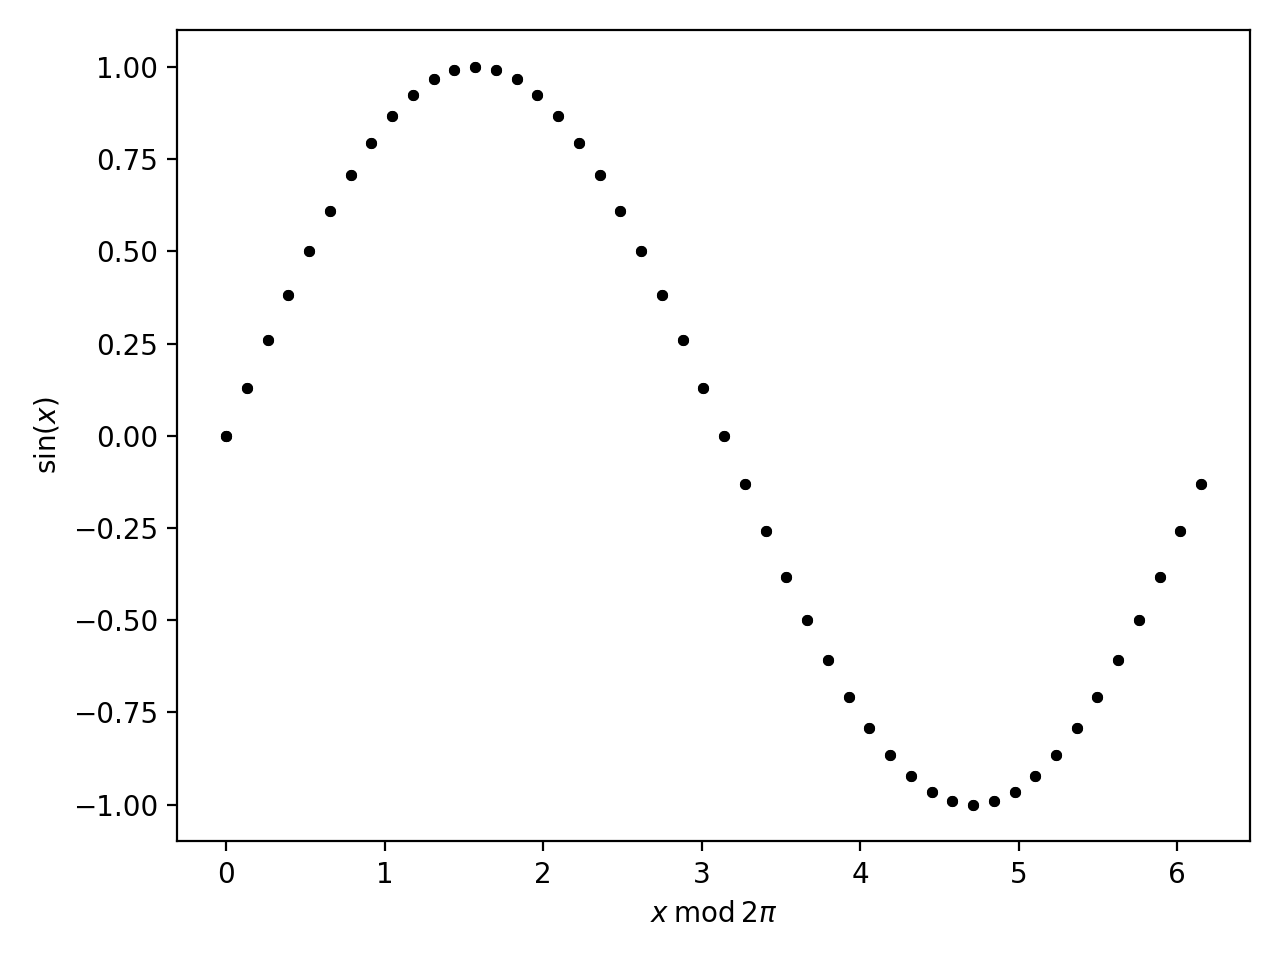

In [33]:
xPhaseFolded=x%(2*np.pi)

plt.figure()
plt.plot(xPhaseFolded,y,'k.')
plt.xlabel("$x\:\mathrm{mod}\: 2\pi$")
plt.ylabel("$\sin(x)$")
plt.tight_layout()
plt.show()

**Beautiful!** 

Sometimes though we do not exactly know the period exactly though, and a small variation in period can lead to a funny looking phase fold so, if you get a fuzzy looking line try narrowing down your period estimate up and down. This can be tedious and a bit annoying, but when you get a good enough period estimate all the points will align nicely and a clean transit signal will emerge. In the cell below I shift the period estimate towards and away from the correct period so you can see what this looks like.

In [ ]:
#Executing this cell will output several plots, 
#so if you do not need it or dont want to be waiting for the plots to render
#you can skip it

for i in [0.5,0.2,0.1,0.0,-0.01,-0.05]:
    xPhaseFolded=x%(2*np.pi+i)

    plt.figure()
    plt.plot(xPhaseFolded,y,'k.')
    plt.xlabel("$x\:\mathrm{mod}\: 2\pi$+"+str(i))
    plt.ylabel("$\sin(x)$")
    plt.tight_layout()
    plt.show()

### Centering the transit
Once you have managed to get a good phase fold we will need to center our transit at 0 with 0 in the middle of our plot. Doing this will make the data esier to read and analyse.
Let's look at our sin wave example again, and say we want to move the minimum to 0 in the centre of our plot. First we want to move our minimum to the centre of the plot. This is a translation along the x axis. To translate a function $f(x)$ along the $x$ axis by a distance $k$, to produce a new function $f'(x)$ the function $f'(x)$ will be defined by,
$$
f'(x)=f(x+k).
$$

Following this and given that we know the minimum of a sin curve is at $1.5\pi$ and the middle of our plot is at $\pi$, lets translate our sin curve by $-0.5\pi$.

<IPython.core.display.Javascript object>


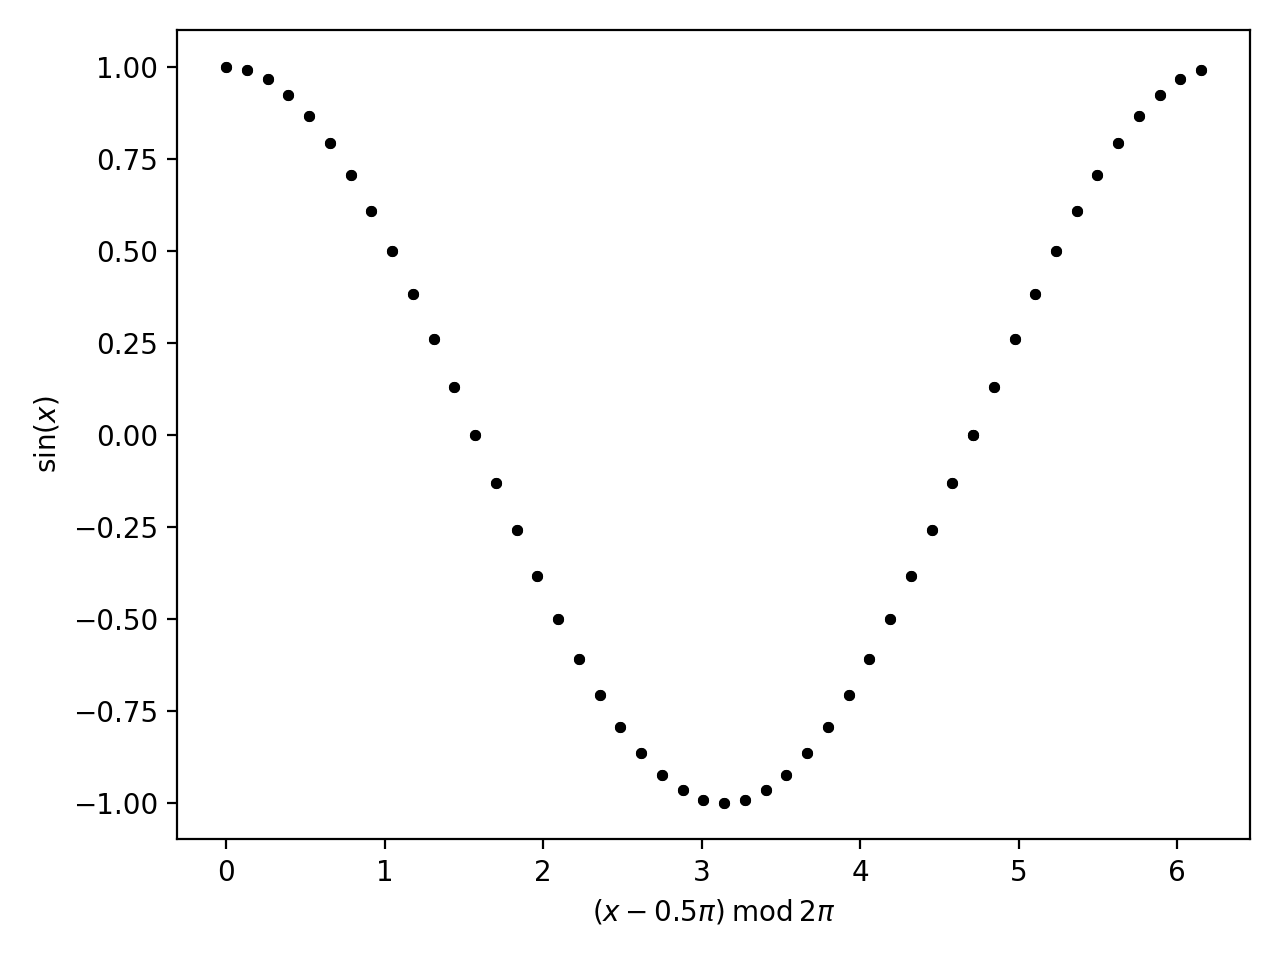

In [22]:
xPhaseFolded=(x-0.5*np.pi)%(2*np.pi) # subtract or add to X to move your function along the x axis
plt.figure()
plt.plot(xPhaseFolded,y,'k.')
plt.xlabel("$(x-0.5\pi)\:\mathrm{mod}\: 2\pi$")
plt.ylabel("$\sin(x)$")
plt.tight_layout()
plt.show()

Now we just need to shift the x axis along so that 0 is in the middle, this woll always be exactly a shift of $0.5T$ which in our case is $\pi$. This is done as follows

<IPython.core.display.Javascript object>


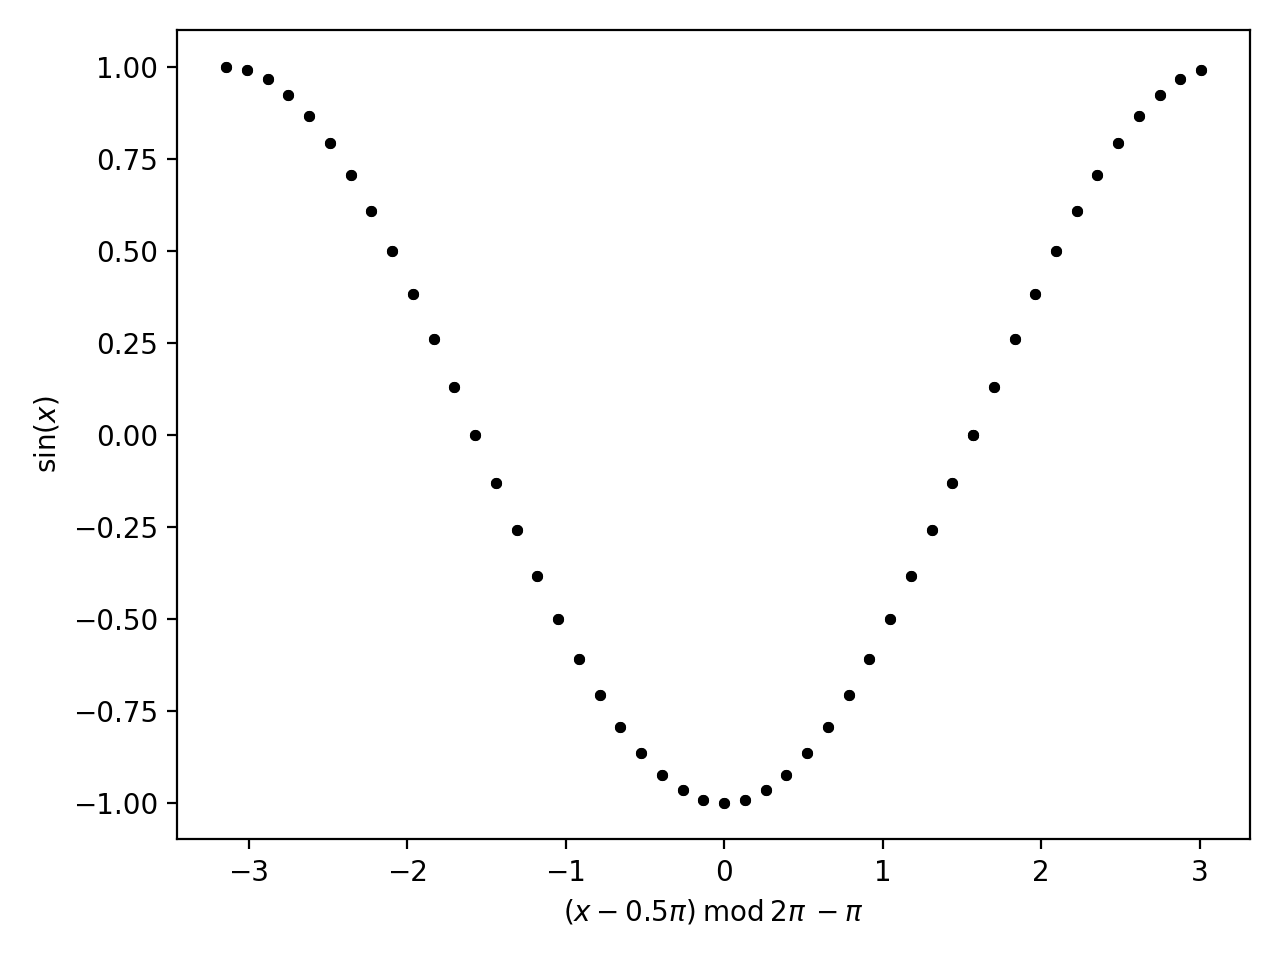

In [21]:
xPhaseFolded=(x-0.5*np.pi)%(2*np.pi)-np.pi # subtract or add to X mod T to move your origin
plt.figure()
plt.plot(xPhaseFolded,y,'k.')
plt.xlabel("$(x-0.5\pi)\:\mathrm{mod}\: 2\pi \: -\pi$")
plt.ylabel("$\sin(x)$")
plt.tight_layout()
plt.show()

I have already phase folded KIC006922244 so you can have an idea what the finished product will more or less look like, the data is in the file ```Data/KIC006922244_phaseFold.dat``` here it is: 

<IPython.core.display.Javascript object>


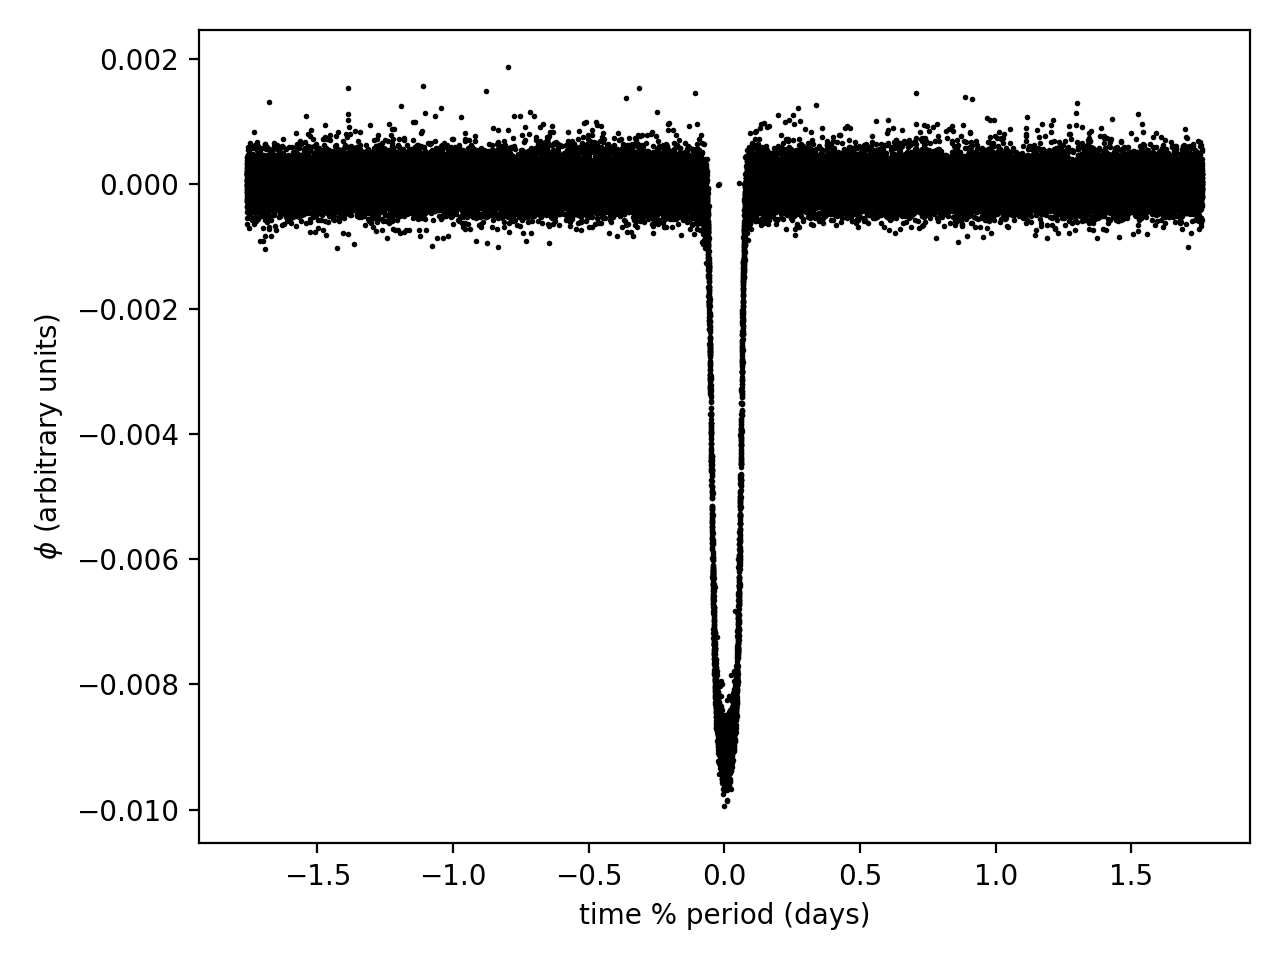

In [28]:
t_pf, flux2 = np.loadtxt("Data/KIC006922244_phaseFold.dat",unpack=True)
plt.figure()
plt.plot(t_pf,flux2,'k.',markersize=2)
plt.xlabel("time % period (days)")
plt.ylabel("$\phi$ (arbitrary units)")
plt.tight_layout()
plt.show()

The period I used for this phase fold was ```T=3.52250```. Try to find the period yourselves, to get a feel for how sensitive the phase fold is to the period estimate.

## What next?
Now that you have taken the first steps in analysing a light curve where do you go next? 


### 1. Fitting a model
With some knowledge about about what planet transits should look at a model can be fit to the data to try and establish the rest of the planetary parameters. With the help of your model you should be able to calculate 
1. Planetary radius
2. Orbital period
3. Semimajor axis
4. Transit impact parameter
5. Orbital inclination
There is a notebook to help guide you in the process of fitting functions using python libraries it is called ```FittingLightCurves.ipynb```

### 2. Explore more light curves
In the data directory, you will find many more light curves, try to find more planets!

### 3. Get creative
You can take your independent research in any direction you want, but here are some suggestions 

1. Extend your search to more Kepler data and even into Tess data (some is already provided in ```./Data/Tess```)
2. Automate your search, write code to automatically determine the planet parameters from a light curve
3. Try find planet parameters for all the planets in a multiplanet system.
